# **Assignment 1**


---


* Below are the 5 main Sections:
  1.   **Design your experiment (Task 1) and report**
  2.   **Program data preprocess (Task 1)**
  3.   **Use at least two clustering algorithms (Task 2)**
  4.   **Program at least two classification algorithms (Task 3)**
  5.   **Discuss results (Task 4) and report**

* The analytics into NewChic dataset aims to find:
  1.   **top 10 products from your selected categories**
  2.   **the best category among your selected categories**

* We need to choose at least as many categories as there are members in your group
  * Why not keep all of the categories?




# **Section 1 - Design your experiment and report (Task 1)**
* As a group we need to select N amount of Catgroies (N > amount of group memebers)
* Need to define on what we mean by the ***Best*** with respect to **products**
  * Eg are the best products the ones with the most **likes_count** ?
  * Eg are the best products the ones with the biggest **Discount**?
* Need to define on what we mean by the ***Best*** with respect to **categories**
  *  Eg are the best categories the ones with the most products?
* **TO ANSWER THESE QUESTIONS WE FIRST NEED TO ANALYSIS THE DATA**




### Example: **successful promotional indicator** = Discount * Likes Count
*  **High Discount with High Likes:** This combination often indicates a
successful promotional strategy. Customers are attracted by the price reduction and rate the product favorably.
*  **High Discount with Low Likes**: Could suggest that despite the price incentive, the product fails to meet customer expectations or that the market for the product is saturated.
*  **Low Discount with High Likes:** A strong indicator of a product’s inherent appeal. It suggests that the product is popular even without significant price reductions, possibly due to quality, brand reputation, or unique features.
* **Low Discount with Low Likes:** Might indicate a product that struggles in the  market, either due to high competition, poor product quality, or ineffective marketing.
* HENCE THE BEST PRODUCT COULD BE:
  1.   **Low Discount with High Likes** --> Product Strength
  2.   **High Discount with High Likes** --> successful promotional strategy



# **Section 2 - Program data preprocess (Task 1)**
* Upload the Zip file and the below function should return all of the .CSV files in a single dataframe

  

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile as zp
import os
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'pandas'

## **Helper Class**

In [ ]:
class ReadData:
  def __init__(self, zip_file_dir, csv_dir):
    self.csv_dir = csv_dir
    self.zip_file_dir = zip_file_dir
    self.combined_df = self.process_all()

  def process_all(self):
    self.unzip()
    return self.combine_csv()

  def unzip(self):
    with zp.ZipFile(self.zip_file_dir, "r") as zip_ref:
      zip_ref.extractall(self.csv_dir)

  def combine_csv(self):
    df_list = []
    dir = os.path.join(self.csv_dir, "A1_2024_Released")
    list_dir = os.listdir(dir)
    list_dir_csv = [filename for filename in list_dir if filename.endswith('.csv')]
    for filename in list_dir_csv:
      file_path = os.path.join(dir, filename)
      df = pd.read_csv(file_path)
      df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df




In [ ]:
# define path variables
zip_file_dir = "/content/A1_2024_Released.zip"
csv_dir = "/content/A1_2024_Unzip"

# obtain the data
data_reader = ReadData(zip_file_dir, csv_dir)
combined_df = data_reader.combined_df

# Display info
combined_df.info()
combined_df.head()

## **EDA**

In [ ]:
# display the 5 summary for the numeric variables
combined_df.describe()

In [ ]:
# Are there any duplicate rows? --> YES
# Potentially need to resolve these issues
dupl_rows = combined_df.groupby(["id"]).size().to_frame("Count")
dupl_rows_g2 = dupl_rows[dupl_rows["Count"]>1]
dupl_rows_g2

In [ ]:
# count per category
category_counts = combined_df["category"].value_counts()
category_percents = category_counts / category_counts.sum() * 100

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust size to your needs
plt.pie(category_percents, labels=category_percents.index, autopct='%1.1f%%')
plt.title('Categories')  # Add a descriptive title
plt.axis('equal')

# Display the legend
plt.legend(title="Categories", loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# Display the Relationship between all numeric variables
# Strong linear relationship between Raw_Price & Current_Price --> Can merge
columns_to_plot = [col for col in combined_df.columns if combined_df[col].dtype in ['float64', 'int64']]
columns_to_plot = [col for col in columns_to_plot if col not in ['id']]
# Create a pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(combined_df, vars=columns_to_plot, kind="reg")
plt.show()

In [ ]:
# Plot Discount vs Category
# Follows a normal distiubtion
# Notice that relationship between discount & likes_count isnt linear

plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, x='discount', y='likes_count', hue='category', palette='Set2')

# Adding titles and labels
plt.title('Discount vs. Likes Count by Category')
plt.xlabel('Discount')
plt.ylabel('Likes Count')

# Show the plot
plt.legend(title='Category')
plt.show()

In [ ]:

# Notice it follows a Exponential distribution
# Use a Log transofrmation to transform it into a normal distriubtion
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_df['likes_count'], fill=True, color='green')
plt.title('Distribution of Likes Count - Density Plot')
plt.xlabel('Likes Count')
plt.ylabel('Density')
plt.show()

In [ ]:
# Plot density
plt.figure(figsize=(10, 6))
sns.kdeplot(np.log(combined_df['likes_count']+1), fill=True, color='green')
plt.title('Distribution of Likes Count - Density Plot')
plt.xlabel('Likes Count')
plt.ylabel('Density')
plt.show()

In [ ]:
# Plot density/distriubtion of Discount
# bimodal Normal distriubtion
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_df['discount'], fill=True, color='green')
plt.title('Distribution of  discount - Density Plot')
plt.xlabel('discount')
plt.ylabel('Density')
plt.show()

In [ ]:
# We need to transform the variables so they are on the "same scale" if not the metric will be bais, favouring the variable with the highest values
# Going to generate a new feature discount_likes_feature = tranformed discount + tranformed Like_count
scaler = StandardScaler()
combined_df_play = combined_df.copy()
combined_df_play['standardized_discount'] = scaler.fit_transform(combined_df_play[['discount']])
combined_df_play['standardized_likes_count'] = scaler.fit_transform(np.log1p(combined_df_play[['likes_count']]))
combined_df_play['discount_likes_feature'] = combined_df_play['standardized_discount'] + combined_df_play['standardized_likes_count']

In [ ]:
combined_df_play['discount_likes_feature'].describe()

In [ ]:
# # Based on out nre metric, we are going to display the top ten "Best" products per category
# top_ten_per_category = combined_df_play.groupby('category').apply(lambda x: x.nlargest(10, 'discount_likes_feature')).reset_index(drop=True)
# top_ten_per_category[top_ten_per_category["category"]=="accessories"]

In [ ]:
# # Plot the standardized version of the previous graph
# # Notice the natural clustering of the diffrent Categories
# # Could use this as a justification to select N cats
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=combined_df_play, x='standardized_discount', y='standardized_likes_count', hue='category', palette='Set2')

# # Adding titles and labels
# plt.title('standardized Discount vs. standardized Likes Count by Category')
# plt.xlabel('Discount')
# plt.ylabel('Likes Count')

# # Show the plot
# plt.legend(title='Category')
# plt.show()

In [ ]:
# # Plot the Top 10 Women Products against the rest of the women items
# top_ten_per_category_women = top_ten_per_category[top_ten_per_category["category"]=="women"].id
# data_women = combined_df_play[combined_df_play["category"]=="women"]
# data_women["top10"] = np.where(data_women["id"].isin(top_ten_per_category_women),1,0)
# data_women["top10"].value_counts()

In [ ]:
# # Plotting
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=data_women, x='standardized_discount', y='standardized_likes_count', hue='top10', style='top10',
#                 palette={1: 'red', 0: 'blue'}, markers={1: 'X', 0: 'o'}, s=40)

# plt.title('Scatter Plot of Standardized Discount vs. Standardized Likes Count for Women Category')
# plt.xlabel('Standardized Discount')
# plt.ylabel('Standardized Likes Count')
# plt.legend(title='Top 10', labels=['Not Top 10', 'Top 10'])
# plt.grid(True)
# plt.show()

* **French**: Soutien-gorge Sexe Adhésif Invisible Sans Bretelles En Silicone
* **English**: Silicone Strapless Invisible Adhesive Sex Bra

In [ ]:
#data_women[data_women["id"].isin(top_ten_per_category_women)][["category","subcategory","name","current_price","raw_price","discount","likes_count","brand","standardized_discount","standardized_likes_count", "discount_likes_feature"]].sort_values(by="discount_likes_feature", ascending=False)

# **Preprocess The Data**
* Only Include the numeric features
* remove the ID feature
* standScaler the features.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
class DataPreProcesser:
  def __init__(self, df):
    self.df = df
    self.preprocess_all()


  def preprocess_all(self):
    self.keep_numeric_cols()
    self.df = self.stdsclar()

  def keep_numeric_cols(self):
    columns_to_keep = [col for col in self.df.columns if self.df[col].dtype in ['float64', 'int64']]
    self.df = self.df[columns_to_keep]
    self.df  = self.df.drop("id", axis=1)

  def stdsclar(self):
    scaler = StandardScaler()
    discount_tmp = scaler.fit_transform(self.df[['discount']])
    likes_tmp = scaler.fit_transform(np.log1p(self.df[['likes_count']]))
    metric = discount_tmp+likes_tmp

    df_sclr = scaler.fit_transform(self.df)  # Ensure only numeric columns are scaled
    df_sclr = pd.DataFrame(df_sclr, columns=self.df.columns)
    df_sclr['metric'] = metric.ravel()
    df_sclr['target'] = np.where(df_sclr['metric']>2, 1, 0)
    df_sclr = df_sclr.drop("metric", axis=1)

    return df_sclr






In [ ]:
dpp = DataPreProcesser(combined_df)
df_pp = dpp.df
df_pp

,current_price,raw_price,discount,likes_count,target
0,0.539525,0.414560,-0.137998,1.279280,0
1,0.993666,1.073155,0.502885,0.308587,0
2,0.857789,1.336867,1.143767,2.481809,1
3,-0.208715,-0.226832,-0.137998,3.164122,1
4,0.985459,1.336867,0.960658,4.794509,1
...,...,...,...,...,...
74994,0.421429,0.611220,0.685994,-0.313411,0
74995,-0.208715,-0.129089,0.411330,-0.336029,0
74996,-0.152176,0.008925,0.685994,-0.253096,0
74997,-0.764993,-0.635008,0.685994,-0.017490,0


<ipython-input-63-496d19dabbed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df_pp, palette='viridis')


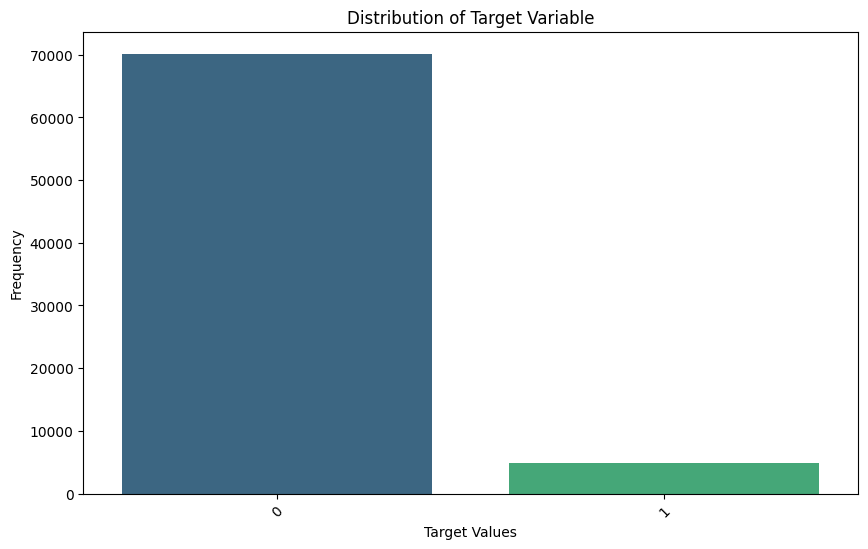

In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='target', data=df_pp, palette='viridis')

# Adding labels and title
plt.xlabel('Target Values')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.xticks(rotation=45)  # Rotate labels if they overlap

# Show the plot
plt.show()

In [ ]:
df_pp.corr()

,current_price,raw_price,discount,likes_count,target
current_price,1.000000,0.853663,-0.156816,0.037084,-0.037419
raw_price,0.853663,1.000000,0.099600,0.036895,0.088513
discount,-0.156816,0.099600,1.000000,-0.002406,0.400887
likes_count,0.037084,0.036895,-0.002406,1.000000,0.399863
target,-0.037419,0.088513,0.400887,0.399863,1.000000


In [ ]:
X = df_pp.drop("target", axis=1)
y = df_pp[["target"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(f"Shape of Train Data:{X_train.shape}")
print(f"Shape of Train Targes:{y_train.shape}")
print(f"Shape of Test Data:{X_test.shape}")
print(f"Shape of Test Targets:{y_test.shape}")

Shape of Train Data:(50249, 4)
Shape of Train Targes:(50249, 1)
Shape of Test Data:(24750, 4)
Shape of Test Targets:(24750, 1)


# **Use at least two clustering algorithms (Task 2)**
* I have use KMEANS + PCA for a quick example of what we could do.
* We could use: DBSCAN, SOM or Etc

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
df_clustering = df_pp.drop("target",axis=1)
df_clustering

,current_price,raw_price,discount,likes_count
0,0.539525,0.414560,-0.137998,1.279280
1,0.993666,1.073155,0.502885,0.308587
2,0.857789,1.336867,1.143767,2.481809
3,-0.208715,-0.226832,-0.137998,3.164122
4,0.985459,1.336867,0.960658,4.794509
...,...,...,...,...
74994,0.421429,0.611220,0.685994,-0.313411
74995,-0.208715,-0.129089,0.411330,-0.336029
74996,-0.152176,0.008925,0.685994,-0.253096
74997,-0.764993,-0.635008,0.685994,-0.017490


## **1 - PCA + KMEANS**

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(df_pp)
n_digits=9
kmeans = KMeans(n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

KMeans(n_clusters=9, n_init=4)

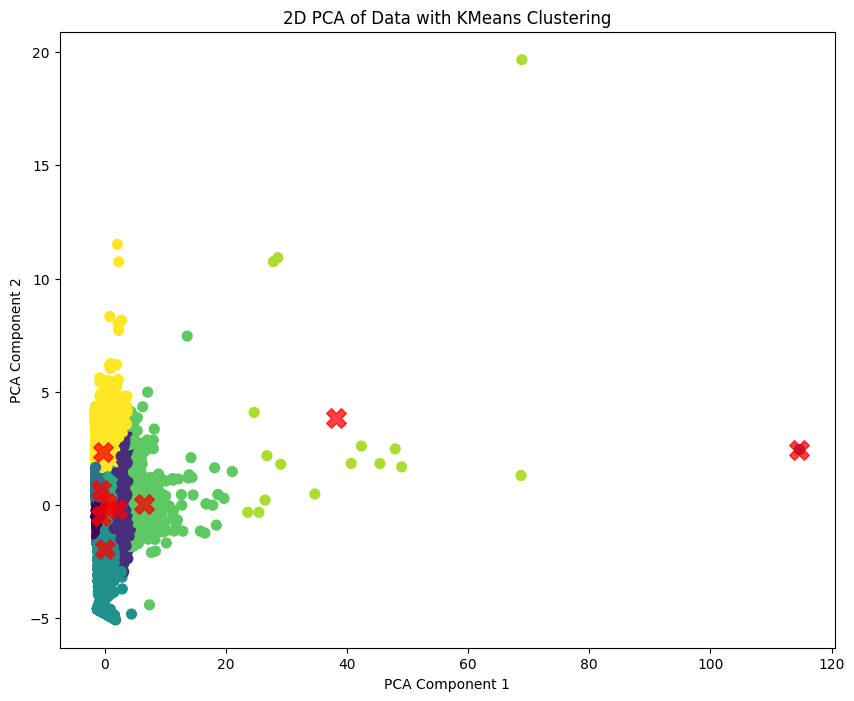

In [ ]:
# Get the cluster labels
labels = kmeans.labels_

# Plotting the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title('2D PCA of Data with KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#  **Section 3 - Use at least two clustering algorithms (Task 2)**

## Basic Example of classifcation (Guidance if you are new to ML)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [ ]:
# Data
# X_train, X_test, y_train, y_test

In [ ]:
# Select whatever model you want
model_lr = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=1000)
# Train the model
model_lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(l1_ratio=0.5, max_iter=1000, penalty='elasticnet',
                   solver='saga')

In [ ]:
# Use the model to predict on the unseen data
yhat = model_lr.predict(X_test)

F1 Scores per class: 0.8466852722427267


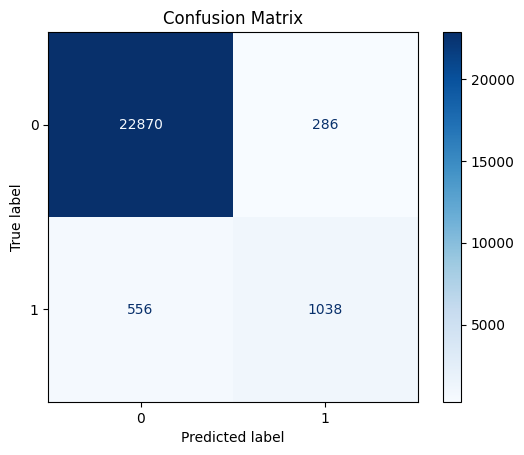

In [ ]:
# Display metrics
f1_scores = f1_score(y_test, yhat, average='macro')
print("F1 Scores per class:", f1_scores)


cm = confusion_matrix(y_test, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_lr.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can change the color map as needed
plt.title('Confusion Matrix')
plt.show()